This was the file used to build all the plots in the report. However, because we iterated on the log structure as we built the report this file became a bit messy. We also had to pull in data from different runs from log files with different structures. For this reason it will not run all the way through.

In [739]:
from diffcam.util import LOGPATH, load_pickle, RECONSTRUCTIONPATH, DATAPATH
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.image as mpimg
import os
import cv2
import collections

In [731]:
def load_data(name, and_contain = ['p'], or_contain = ['p'],  not_contains = ['zzzz']):
    files = []
    files.extend(glob.glob(os.path.join(LOGPATH,name),recursive=True))

    pickles = []
    for f in files:
        if all(x in f for x in and_contain):
            if any(x in f for x in or_contain):
                if not any(x in f for x in not_contains):
                    pickles.append(load_pickle(f))
        
    return pickles

#algo_pickle = load_data("ridge*.pkl")
#all_pickle = load_data("*.pkl")

In [710]:
# Grab first level information

def get_data_from_dict(pickle):
    lambda_ = []
    algo = []
    delta = []
    mse = []
    psnr = []
    ssim = []
    lpips = []
    mse_mean = []
    psnr_mean = []
    ssim_mean = []
    lpips_mean = []
    n_iter = []
    images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']
    lenseless = []

    for save in pickle:
        algo.append(save['algo'])
        lambda_.append(save['lambda'])
        delta.append(save['delta'])
        mse.append(save['mse'])
        psnr.append(save['psnr'])
        ssim.append(save['ssim'])
        lpips.append(save['lpips'])
        mse_mean.append(sum(save['mse'])/len(save['mse']))
        psnr_mean.append(sum(save['psnr'])/len(save['psnr']))
        ssim_mean.append(sum(save['ssim'])/len(save['ssim']))
        lpips_mean.append(sum(save['lpips'])/len(save['lpips']))
        n_iter.append(save['n_iter'])

        fp = []
        for im in images:
            try:
                fp.append(save[im]['recon_fp'])
            except:
                pass
        lenseless.append(fp)
    return lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless

In [711]:
def get_photo(path, color = False):
    end = os.path.split(path)[-1]
    path = os.path.join(RECONSTRUCTIONPATH, end)
    data = mpimg.imread(path)
    if color:
        data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    return data

In [ ]:
one_first_runs_pickle = load_data("ridge*.pkl", ['100', '291229'],['p'],['1000'])
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(one_first_runs_pickle)

In [ ]:
gt = []
for i in range(1,9):
    gt.append(os.path.join(DATAPATH,'our_images','lensed',f'img{i}_original.png'))

run = len(lenseless)
fig, ax = plt.subplots(run+1, 7, figsize=(18,15))
ax[0,0].imshow(cv2.cvtColor(cv2.imread(gt[0]), cv2.COLOR_BGR2RGB))
ax[0,1].imshow(cv2.cvtColor(cv2.imread(gt[2]), cv2.COLOR_BGR2RGB))
ax[0,2].imshow(cv2.cvtColor(cv2.imread(gt[3]), cv2.COLOR_BGR2RGB))
ax[0,3].imshow(cv2.cvtColor(cv2.imread(gt[4]), cv2.COLOR_BGR2RGB))
ax[0,4].imshow(cv2.cvtColor(cv2.imread(gt[5]), cv2.COLOR_BGR2RGB))
ax[0,5].imshow(cv2.cvtColor(cv2.imread(gt[6]), cv2.COLOR_BGR2RGB))
ax[0,6].imshow(cv2.cvtColor(cv2.imread(gt[7]), cv2.COLOR_BGR2RGB))
for i in range(0,run):
    for j in range(len(lenseless[i])):
        ax[i+1,j].imshow(get_photo(lenseless[i][j]))
        ax[i+1, 0].set_ylabel(f"{algo[i]}_{lambda_[i]}")

for i in range(0,run+1):
    for j in range(len(lenseless[i])):      
        ax[i, j].xaxis.set_visible(False)
        plt.setp(ax[i, j].spines.values(), visible=False)
        ax[i, j].tick_params(left=False, labelleft=False)
        ax[i, j].patch.set_visible(False)
        plt.tight_layout()
plt.show()

In [716]:
pickle1000 = load_data("*.pkl", ['1000', '291229'],['pls_huber', 'pls', 'lasso', '.1', '.2', '.3',], ['1e'])
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(pickle1000)

In [713]:
lenseless = list(np.array(lenseless)[[2,6,8,0,7,3,4,5,1]])
algo = list(np.array(algo)[[2,6,8,0,7,3,4,5,1]])
lambda_ = list(np.array(lambda_)[[2,6,8,0,7,3,4,5,1]])

In [ ]:
gt = []
for i in range(1,9):
    gt.append(os.path.join(DATAPATH,'our_images','lensed',f'img{i}_original.png'))

run = len(lenseless)
plt.figure(figsize = (3,2))
fig = plt.imshow(cv2.cvtColor(cv2.imread(gt[0]), cv2.COLOR_BGR2RGB))
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

fig, ax = plt.subplots(3, 3, figsize=(8,6))
for i in range(len(lenseless)):
    ax[i//3, i%3].imshow(get_photo(lenseless[i][0], color=True))
    ax[i//3, i%3].set_title(f"{algo[i]}_{lambda_[i]}")   
    ax[i//3, i%3].xaxis.set_visible(False)
    plt.setp(ax[i//3, i%3].spines.values(), visible=False)
    ax[i//3, i%3].tick_params(left=False, labelleft=False)
    ax[i//3, i%3].patch.set_visible(False)
    plt.tight_layout()
plt.show()

In [718]:
first_runs_pickle = load_data("*.pkl", ['100', '291229'],['p'],['1000'])
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(first_runs_pickle)

In [720]:
first_runs_pickle

[{'data': 'our_images',
  'psf_fp': '/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/psf/psf_rgb_ours.png',
  'algo': 'lasso',
  'n_iter': 100,
  'gray': False,
  'lambda': 0.1,
  'delta': 100,
  'img8_rgb': {'lenseless_fp': '/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/our_images/diffuser/img8_rgb.png',
   'lensed_fp': '/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/our_images/lensed/img8_original.png',
   'recon_fp': PosixPath('/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/reconstruction/img8_lasso_100_2912292021_08h30.png'),
   'ucrop_recon_fp': PosixPath('/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/reconstruction/uncropped_img8_lasso_100_2912292021_08h30.png'),
   'process_time': 158.47670199999993,
   'est_min': -1.173632154558479e-07,
   'est_max': 3.3529434615640755e-05,
   'mse': 0.16184229346615484,
   'psnr': 7.90

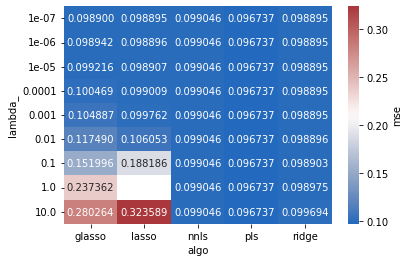

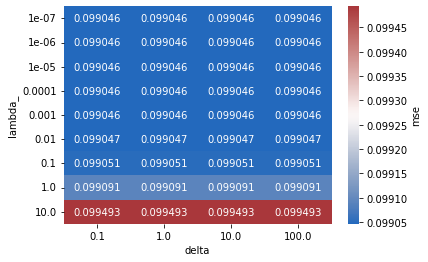

In [719]:
# Will Likely not work as above

def heatmap(metric, algo, lambda_, delta, metric_name):
    a = {metric_name:metric, "algo": algo, "lambda_":lambda_, "delta":delta, "n_iter":n_iter}
    df = pd.DataFrame(a)

    df_huber = df[(df['algo']=='pls_huber') & (df['n_iter'] == 100)]
    df = df[df['algo']!='pls_huber']

    df = df.pivot(index='lambda_', columns="algo", values=metric_name)

    sns.heatmap(df, annot=True, fmt="f", cbar_kws={'label': metric_name}, cmap="vlag")
    plt.show()
    df_huber = df_huber.pivot("lambda_","delta",metric_name)
    sns.heatmap(df_huber, annot=True, fmt="f", cbar_kws={'label': metric_name}, cmap="vlag")
    plt.show()
    
heatmap(mse_mean, algo, lambda_, delta, "mse")

In [ ]:
algo_lambda = [i +"_"+ str(j) for i, j in zip(algo, lambda_)]
image_order = [['img8_rgb', 'img1_rgb', 'img3_rgb', 'img6_rgb', 'img7_rgb','img5_rgb','img4_rgb']]*len(mse)

In [ ]:
a = {'mse':mse, "algo_lambda":algo_lambda, "n_iter":n_iter, "image_order": image_order}
df = pd.DataFrame(a)

df = df[~(df['algo_lambda'].str.contains('pls_huber'))]
df = df.explode(['mse', 'image_order'])

df = df.pivot('algo_lambda', "image_order", "mse").reset_index(drop=False)

In [ ]:
g = sns.PairGrid(df,
                 x_vars=df.columns[1:], y_vars=['algo_lambda'],
                 height=10, aspect=.25)
g.map(sns.stripplot, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(.05, .6), xlabel="MSE", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['img8_rgb', 'img1_rgb', 'img3_rgb', 'img6_rgb', 'img7_rgb','img5_rgb','img4_rgb']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [658]:
# Grab first level information

def get_data_from_dict(pickle):
    lambda_ = []
    algo = []
    delta = []
    mse = []
    psnr = []
    ssim = []
    lpips = []
    mse_mean = []
    psnr_mean = []
    ssim_mean = []
    lpips_mean = []
    n_iter = []
    images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']
    lenseless = []
    process_time = []

    for save in pickle:
        algo.append(save['algo'])
        lambda_.append(save['lambda'])
        delta.append(save['delta'])
#         mse.append(save['mse'])
#         psnr.append(save['psnr'])
#         ssim.append(save['ssim'])
#         lpips.append(save['lpips'])
        mse_mean.append(sum(save['mse'])/len(save['mse']))
        psnr_mean.append(sum(save['psnr'])/len(save['psnr']))
        ssim_mean.append(sum(save['ssim'])/len(save['ssim']))
        lpips_mean.append(sum(save['lpips'])/len(save['lpips']))
        n_iter.append(save['n_iter'])

        fp = []
        m = []
        p = []
        s = []
        l = []
        time = []
        for im in images:
            try:
                fp.append(save[im]['recon_fp'])
                m.append(save[im]['mse'])
                p.append(save[im]['psnr'])
                s.append(save[im]['ssim'])
                l.append(save[im]['lpips'])
                time.append(save[im]['process_time'])
            except:
                pass
        lenseless.append(fp)
        mse.append(m)
        psnr.append(p)
        ssim.append(s)
        lpips.append(l)
        process_time.append(time)
    return lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless, process_time

In [652]:
final_runs_pickle = load_data("*.pkl", ['glass'], ['250','500','750','1000'], ['.1','.2','.3'])

In [654]:
len(final_runs_pickle)

28

In [655]:
save_final_runs_pickle = []
for p in final_runs_pickle:
    try:
        p['img4_rgb']
        save_final_runs_pickle.append(p)
    except:
        pass#print(p['algo'])

In [659]:
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless, process_time = get_data_from_dict(save_final_runs_pickle)

In [678]:
algo

['glasso', 'glasso', 'glasso', 'glasso']

In [681]:
a = {"mse":mse, "psnr":psnr,"ssim":ssim,"lpips":lpips, "algo":list(np.array([algo]*7).T), "iters":list(np.array([n_iter]*7).T), "images":[images]*4}

In [682]:
df_glasso = pd.DataFrame(a)

In [683]:
len(df_glasso['algo'][0])

7

In [685]:
df_glasso = df_glasso.explode(['mse','psnr','ssim','lpips','algo','iters','images'])

In [661]:
mse

[[0.07817289418236179,
  0.09626613684592994,
  0.09841862428753305,
  0.01158427552715817,
  0.020424494949680367,
  0.06493990229714607,
  0.0411518347029527],
 [0.07817289418236179,
  0.09626613684592994,
  0.07230526302983555,
  0.01158427552715817,
  0.020424494949680367,
  0.06493990229714607,
  0.0411518347029527],
 [0.07817289418236179,
  0.09626613684592994,
  0.07950008484292569,
  0.01158427552715817,
  0.020424494949680367,
  0.06493990229714607,
  0.0411518347029527],
 [0.07817289418236179,
  0.09626613684592994,
  0.12002738195202108,
  0.01158427552715817,
  0.020424494949680367,
  0.06493990229714607,
  0.0411518347029527]]

In [458]:
mse

[[0.07822461953087824,
  0.0963407311835692,
  0.12042354900090095,
  0.01158582919830014,
  0.020436281364047727,
  0.06505360339605416,
  0.04119552995403558],
 [0.07821251660462986,
  0.09654550289564592,
  0.12043635908151203,
  0.0115946086467267,
  0.020484654445879723,
  0.06513003441271191,
  0.0411965761895374],
 [0.08343292891880869,
  0.15461182460323195,
  0.12211604741290563,
  0.01243797282036519,
  0.025966313342476354,
  0.08296960999794332,
  0.047723521289047235],
 [0.07817289418236179,
  0.09626613684592994,
  0.12002738195202108,
  0.01158427552715817,
  0.020424494949680367,
  0.06493990229714607,
  0.0411518347029527]]

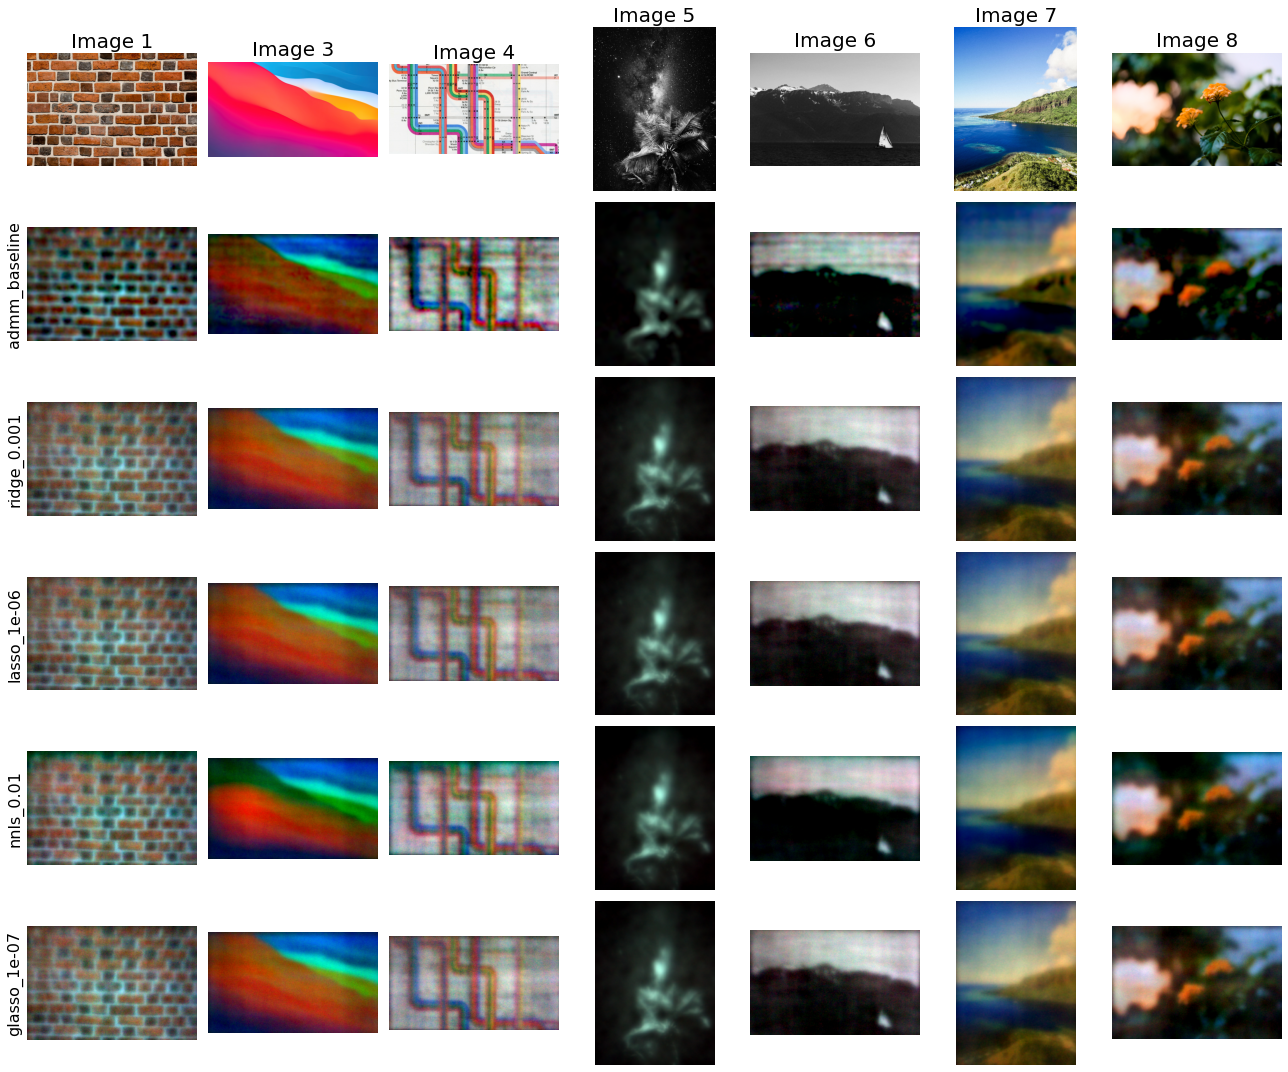

In [105]:
gt = []
for i in range(1,9):
    gt.append(os.path.join(DATAPATH,'our_images','lensed',f'img{i}_original.png'))

run = len(lenseless)
fig, ax = plt.subplots(run+1, 7, figsize=(18,15))
ax[0,0].imshow(cv2.cvtColor(cv2.imread(gt[0]), cv2.COLOR_BGR2RGB))
ax[0,0].set_title('Image 1', fontsize=20)
ax[0,1].imshow(cv2.cvtColor(cv2.imread(gt[2]), cv2.COLOR_BGR2RGB))
ax[0,1].set_title('Image 3', fontsize=20)
ax[0,2].imshow(cv2.cvtColor(cv2.imread(gt[3]), cv2.COLOR_BGR2RGB))
ax[0,2].set_title('Image 4', fontsize=20)
ax[0,3].imshow(cv2.cvtColor(cv2.imread(gt[4]), cv2.COLOR_BGR2RGB))
ax[0,3].set_title('Image 5', fontsize=20)
ax[0,4].imshow(cv2.cvtColor(cv2.imread(gt[5]), cv2.COLOR_BGR2RGB))
ax[0,4].set_title('Image 6', fontsize=20)
ax[0,5].imshow(cv2.cvtColor(cv2.imread(gt[6]), cv2.COLOR_BGR2RGB))
ax[0,5].set_title('Image 7', fontsize=20)
ax[0,6].imshow(cv2.cvtColor(cv2.imread(gt[7]), cv2.COLOR_BGR2RGB))
ax[0,6].set_title('Image 8', fontsize=20)
for i in range(0,run):
    for j in range(len(lenseless[i])):
        ax[i+1,j].imshow(get_photo(lenseless[i][j]))
        if algo[i] == 'admm':
            ax[i+1, 0].set_ylabel(f"{algo[i]}_baseline", fontsize=16)
        else:
            ax[i+1, 0].set_ylabel(f"{algo[i]}_{lambda_[i]}", fontsize=16)

for i in range(0,run+1):
    for j in range(7):      
        ax[i, j].xaxis.set_visible(False)
        plt.setp(ax[i, j].spines.values(), visible=False)
        ax[i, j].tick_params(left=False, labelleft=False)
        ax[i, j].patch.set_visible(False)
        plt.tight_layout()
plt.show()

In [121]:
def calc_average(lst):
    new = []
    for val in lst:
        new.append(sum(val)/len(val))
    return new

In [122]:
mse = calc_average(mse)
psnr = calc_average(psnr)
ssim = calc_average(ssim)
lpips = calc_average(lpips)
process_time = calc_average(process_time)

In [123]:
mse = calc_average(mse_admm) + mse
psnr = calc_average(psnr_admm) + psnr
ssim = calc_average(ssim_admm) + ssim
lpips = calc_average(lpips_admm) + lpips
process_time = calc_average(process_time_admm) + process_time

In [124]:
a = {"algo":algo,"mean mse":mse, "mean psnr":psnr,"mean ssim":ssim, "mean lpips":lpips, "time (s)":process_time}

In [125]:
df = pd.DataFrame(a)

In [126]:
df = df.set_index('algo')

In [127]:
df['time (s)'] = df['time (s)'].round(1)

In [128]:
df

,mean mse,mean psnr,mean ssim,mean lpips,time (s)
algo,,,,,
admm,0.087789,11.509514,0.346748,0.639499,15.1
ridge,0.061894,13.199550,0.480487,0.618882,1402.5
lasso,0.061943,13.195581,0.479841,0.618768,1214.3
nnls,0.075608,12.422622,0.412996,0.615286,1167.4
glasso,0.061795,13.204670,0.481097,0.618561,1458.2


In [61]:
admm = load_data('admm*.pkl', ['None'])

In [62]:
admm

[{'data': 'our_images',
  'psf_fp': '/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/psf/psf_rgb_ours.png',
  'algo': 'admm',
  'gray': False,
  'lambda': 1,
  'delta': 1,
  'n_iter': None,
  'mse': [0.07900688467849638,
   0.08505248177462305,
   0.07415744138304058,
   0.06055936856407606,
   0.11823586861758453,
   0.14844842889420354,
   0.14227780024210707,
   0.11768952120823674,
   0.17480352704666505,
   0.18657961078220767,
   0.15402594714853568,
   0.14126786123316026,
   0.06497433515141546,
   0.05705394232098671,
   0.05023072835161181,
   0.032462343936755796,
   0.1233288877161795,
   0.1745181808340845,
   0.1485246122586984,
   0.10722256926735745,
   0.020524123758155353,
   0.02616517093007812,
   0.021777793498979684,
   0.018274581702156564,
   0.21626968407030703,
   0.2125238258465374,
   0.17029934080274256,
   0.13704520838475948],
  'psnr': [11.023350625373665,
   10.70313009443547,
   11.298452628494822,
   12.178186617538076,


In [728]:
def get_data_from_dict(pickle,
                       iters,
                       images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']):
    
    lambda_ = []
    algo = []
    delta = []
    
    mse = []
    psnr = []
    ssim = []
    lpips = []
    n_iter = []
    lenseless = []
    process_time = []

    for save in pickle:
        algo.append(save['algo'])
        lambda_.append(save['lambda'])
        delta.append(save['delta'])

        fp = []
        m = []
        p = []
        s = []
        l = []
        time = []
        for im in images:
            pic = save[im]
            for i in iters:
                fp.append(pic[str(i)]['recon_fp'])
                m.append(pic[str(i)]['mse'])
                p.append(pic[str(i)]['psnr'])
                s.append(pic[str(i)]['ssim'])
                l.append(pic[str(i)]['lpips'])
                time.append(pic[str(i)]['process_time'])
        lenseless.append(fp)
        mse.append(m)
        psnr.append(p)
        ssim.append(s)
        lpips.append(l)
        process_time.append(time)
    return lambda_, algo, delta, mse, psnr, ssim, lpips, n_iter, images, lenseless, process_time

In [463]:
admm = load_data("admm*.pkl", ['5, 5'])

In [464]:
lambda_admm, algo_admm, _, mse_admm, psnr_admm,ssim_admm,lpips_admm, _, _, lenseless_admm, process_time_admm = get_data_from_dict(admm, [5])

In [136]:
lenseless = lenseless_admm + lenseless
algo = algo_admm + algo
lambda_ = lambda_admm + lambda_

In [359]:
images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']

In [360]:
a = {"algo":list(np.array([algo]*7).T),"mse":mse_admm+mse, "psnr":psnr_admm + psnr,"ssim":ssim_admm+ ssim,"lpips":lpips_admm+lpips, 'image': [images]*5,"time":process_time_admm + process_time}

In [361]:
df = pd.DataFrame(a).explode(['mse', 'psnr','ssim','lpips','algo','image','time'])

ValueError: All arrays must be of the same length

In [346]:
df = df.sort_values(['image','algo'])

In [347]:
df = df[df['image'] == 'img8_rgb'].drop('image', axis=1).set_index('algo')
df['time'] = df['time'].astype(int)

In [348]:
df.style.highlight_min(color = 'lightblue',subset =['mse','lpips','time'], axis = 0).highlight_max(color = 'lightblue',subset=['psnr','ssim'], axis = 0)

,mse,psnr,ssim,lpips,time
algo,,,,,
admm,0.107223,9.697138,0.4357892,0.546180,15
glasso,0.064940,11.874884,0.571815,0.502231,1460
lasso,0.065130,11.862187,0.5711222,0.502017,1199
nnls,0.082970,10.810810,0.50409764,0.504615,1165
ridge,0.065054,11.867286,0.57130593,0.502014,1401


In [390]:
admm_over_time = []

In [445]:
lambda_admm, algo_admm, _, mse_admm, psnr_admm,ssim_admm,lpips_admm, _, _, lenseless_admm, process_time_admm = get_data_from_dict(admm, [50])

KeyError: '50'

In [444]:
admm_over_time.append(lenseless_admm[0][5])

In [446]:
admm_over_time

[PosixPath('/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/reconstruction/img7_admm_5_3012302021_13h22.png'),
 PosixPath('/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/reconstruction/img7_admm_10_3012302021_13h22.png'),
 PosixPath('/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/reconstruction/img7_admm_15_3012302021_13h22.png'),
 PosixPath('/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/reconstruction/img7_admm_20_3012302021_13h22.png'),
 PosixPath('/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/reconstruction/img7_admm_30_3012302021_13h02.png'),
 PosixPath('/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/reconstruction/img7_admm_40_3012302021_13h02.png')]

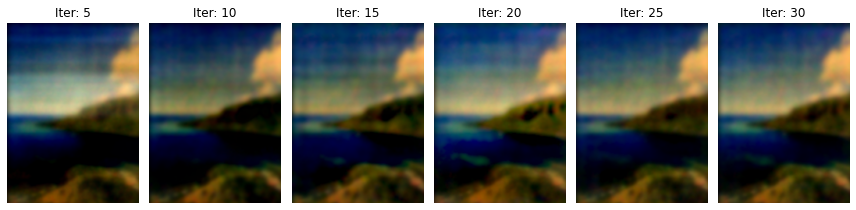

In [451]:
fig, ax = plt.subplots(1, 6, figsize=(12,8))
for i in range(0,6):
    ax[i].imshow(get_photo(admm_over_time[i]))
    ax[i].set_title(f'Iter: {(i+1)*5}')
    
    ax[i].xaxis.set_visible(False)
    plt.setp(ax[i].spines.values(), visible=False)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].patch.set_visible(False)
    plt.tight_layout()
plt.show()

In [412]:
glasso_over_time = load_data("*.pkl", ['glasso'], ['250','500','750','1000'], ['.1','.2','.3'])

In [414]:
save_final_runs_glasso = []
for p in glasso_over_time:
    try:
        p['img4_rgb']
        save_final_runs_glasso.append(p)
    except:
        pass#print(p['algo'])

In [419]:
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless, process_time = get_data_from_dict(save_final_runs_glasso)

In [435]:
glasso_over_time = ['/img7_glasso_250_3012302021_01h56.png','/img7_glasso_500_3012302021_01h56.png','/img7_glasso_750_3012302021_01h56.png','/img7_glasso_1000_3012302021_01h56.png']

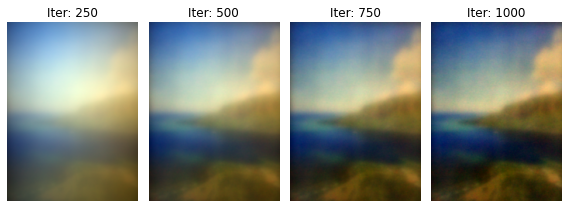

In [436]:
fig, ax = plt.subplots(1, 4, figsize=(8,6))
for i in range(0,4):
    ax[i].imshow(get_photo(glasso_over_time[i]))
    ax[i].set_title(f'Iter: {(i+1)*250}')
    
    ax[i].xaxis.set_visible(False)
    plt.setp(ax[i].spines.values(), visible=False)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].patch.set_visible(False)
    plt.tight_layout()
plt.show()

In [895]:
new_mse = []
new_psnr = []
new_ssim= []
new_lpips = []
new_time = []

In [905]:
admm = load_data("admm*.pkl", ['10, 10'])

In [908]:
lambda_admm, algo_admm, _, mse_admm, psnr_admm,ssim_admm,lpips_admm, _, _, lenseless_admm, process_time_admm = get_data_from_dict(admm, [40])

In [909]:
new_mse.append(mse_admm[0])
new_psnr.append(psnr_admm[0])
new_ssim.append(ssim_admm[0])
new_lpips.append(lpips_admm[0])
new_time.append(process_time_admm[0])

In [912]:
iters = [5, 10, 15, 20, 30, 40]
admm_list = ['admm', 'admm', 'admm', 'admm', 'admm', 'admm', 'admm']
images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']

In [913]:
a = {"mse":new_mse, "psnr":new_psnr,"ssim":new_ssim,"lpips":new_lpips, "algo":[admm_list]*6, "iters":list(np.array([iters]*7).T), "images":[images]*6, "time":new_time}

In [941]:
df = pd.DataFrame(a)

In [942]:
df = df.explode(['mse','psnr','ssim','lpips','algo','iters','images', 'time'])

In [943]:
plotting_changes_df = pd.concat([df, df_glasso])

In [960]:
plotting_changes_df

,mse,psnr,ssim,lpips,algo,iters,images,time
0,0.118236,9.272508,0.122106,0.83477,admm,5,img1_rgb,3.999142
0,0.174804,7.574498,0.423919,0.579694,admm,5,img3_rgb,4.009928
0,0.21627,6.650044,0.301838,0.815094,admm,5,img4_rgb,4.07259
0,0.020524,16.877354,0.319291,0.726912,admm,5,img5_rgb,4.039214
0,0.064974,11.872582,0.377706,0.657161,admm,5,img6_rgb,4.096033
...,...,...,...,...,...,...,...,...
9,0.120027,9.207197,0.368711,0.816915,glasso,1000,img4_rgb,1589.939746
9,0.011584,19.361311,0.584663,0.677491,glasso,1000,img5_rgb,1521.97596
9,0.020424,16.898487,0.605936,0.58386,glasso,1000,img6_rgb,1518.602517
9,0.06494,11.874883,0.571815,0.502231,glasso,1000,img7_rgb,1479.248883


In [953]:
plotting_changes_df_1 = plotting_changes_df[plotting_changes_df['images']=='img1_rgb'].reset_index(drop=True)
plotting_changes_df_3 = plotting_changes_df[plotting_changes_df['images']=='img3_rgb'].reset_index(drop=True)
plotting_changes_df_4 = plotting_changes_df[plotting_changes_df['images']=='img4_rgb'].reset_index(drop=True)
plotting_changes_df_5 = plotting_changes_df[plotting_changes_df['images']=='img5_rgb'].reset_index(drop=True)
plotting_changes_df_6 = plotting_changes_df[plotting_changes_df['images']=='img6_rgb'].reset_index(drop=True)
plotting_changes_df_7 = plotting_changes_df[plotting_changes_df['images']=='img7_rgb'].reset_index(drop=True)
plotting_changes_df_8 = plotting_changes_df[plotting_changes_df['images']=='img8_rgb'].reset_index(drop=True)

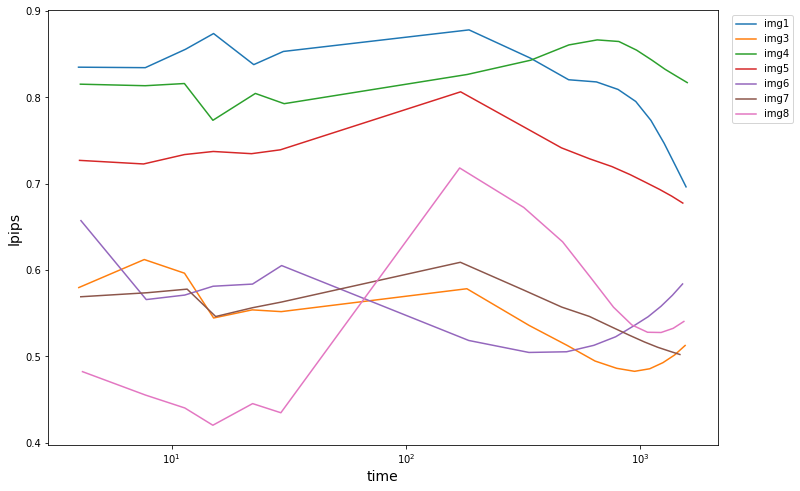

In [990]:
metrics = 'lpips'

sns.color_palette("Set2")
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.lineplot(data = plotting_changes_df_1, x = 'time',y=metrics, ax=ax, alpha=1, label='img1')
sns.lineplot(data = plotting_changes_df_3, x = 'time',y=metrics, ax=ax, label='img3')
sns.lineplot(data = plotting_changes_df_4, x = 'time',y=metrics, ax=ax, label='img4')
sns.lineplot(data = plotting_changes_df_5, x = 'time',y=metrics, ax=ax, label='img5')
sns.lineplot(data = plotting_changes_df_6, x = 'time',y=metrics, ax=ax, label='img6')
sns.lineplot(data = plotting_changes_df_7, x = 'time',y=metrics, ax=ax, label='img7')
sns.lineplot(data = plotting_changes_df_8, x = 'time',y=metrics, ax=ax, label='img8')
ax.legend(loc='best', bbox_to_anchor=(.62, 0., 0.5, 1))
ax.set_xscale('symlog')
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
plt.show()

In [945]:
plotting_changes_df_1

,mse,psnr,ssim,lpips,algo,iters,images,time
0,0.118236,9.272508,0.122106,0.83477,admm,5,img1_rgb,3.999142
1,0.148448,8.284244,0.102224,0.834206,admm,10,img1_rgb,7.711199
2,0.142278,8.468629,0.110113,0.855475,admm,15,img1_rgb,11.449908
3,0.11769,9.292622,0.12806,0.873704,admm,20,img1_rgb,15.091014
4,0.126589,8.976043,0.123438,0.83772,admm,30,img1_rgb,22.40399
5,0.129244,8.885913,0.117965,0.852968,admm,40,img1_rgb,29.968035
6,0.132232,8.78665,0.199643,0.877933,glasso,100,img1_rgb,186.036625
7,0.127841,8.933294,0.196413,0.845215,glasso,200,img1_rgb,340.302223
8,0.113886,9.435298,0.193917,0.820221,glasso,300,img1_rgb,495.422731
9,0.099332,10.029102,0.190783,0.817706,glasso,400,img1_rgb,651.223415


In [756]:
glasso = load_data("glasso*.pkl", ['100,'])

In [881]:
mse_list = []
psnr_list = []
ssim_list = []
lpips_list = []
process_list = []
for i in range(1,11):
    lambda_, algo, delta, mse, psnr, ssim, lpips, n_iter, images, lenseless, process_time = get_data_from_dict(glasso, [100*i])
    mse_list.append(mse[0])
    psnr_list.append(psnr[0])
    ssim_list.append(ssim[0])
    lpips_list.append(lpips[0])
    process_list.append(process_time[0])

In [791]:
iters = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
admm_list = ['glasso', 'glasso', 'glasso', 'glasso', 'glasso', 'glasso', 'glasso']
images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']

In [883]:
a = {"mse":mse_list, "psnr":psnr_list,"ssim":ssim_list,"lpips":lpips_list, "algo":[admm_list]*10, "iters":list(np.array([iters]*7).T), "images":[images]*10, "time": process_list}

In [887]:
df_glasso = pd.DataFrame(a)

In [888]:
df_glasso = df_glasso.explode(['mse','psnr','ssim','lpips','algo','iters','images', 'time'])

In [889]:
df_glasso

,mse,psnr,ssim,lpips,algo,iters,images,time
0,0.132232,8.78665,0.199643,0.877933,glasso,100,img1_rgb,186.036625
0,0.080486,10.942814,0.731441,0.578349,glasso,100,img3_rgb,182.117457
0,0.076682,11.153087,0.438672,0.826344,glasso,100,img4_rgb,182.872248
0,0.152587,8.164838,0.236613,0.806245,glasso,100,img5_rgb,171.252001
0,0.0516,12.873527,0.72102,0.518464,glasso,100,img6_rgb,185.517587
...,...,...,...,...,...,...,...,...
9,0.120027,9.207197,0.368711,0.816915,glasso,1000,img4_rgb,1589.939746
9,0.011584,19.361311,0.584663,0.677491,glasso,1000,img5_rgb,1521.97596
9,0.020424,16.898487,0.605936,0.58386,glasso,1000,img6_rgb,1518.602517
9,0.06494,11.874883,0.571815,0.502231,glasso,1000,img7_rgb,1479.248883
